 <img src='logo_Codsoft.jpg' align='left'>
 <h1> CodSoft : Data Science Internship Tasks </h1>

<h2> Task 4 : SALES PREDICTION USING PYTHON  </h2>
<h4> Target : Forecasting the amount of a product that customers will purchase based on the money spent on advertising</h4>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing linear regression model to use in prediction
from sklearn.linear_model import LinearRegression

# Importing train_test_split to split the data to features and target
from sklearn.model_selection import train_test_split

In [3]:
# Reading The data by passing the path of data file
advertising=pd.read_csv('advertising.csv')

In [4]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Visualization


In [9]:
sns.set()

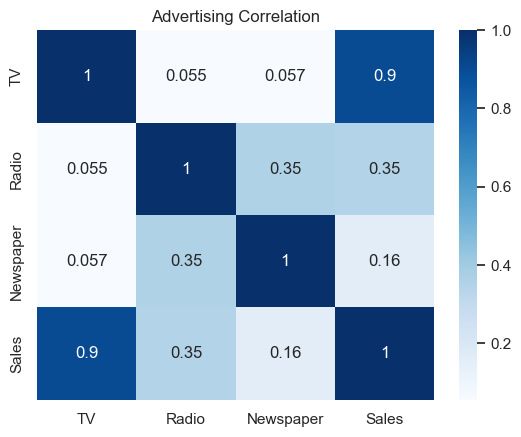

In [10]:
# Visualizing the correlation between our data
sns.heatmap(advertising.corr(),annot=True,cmap='Blues')
plt.title('Advertising Correlation')
plt.show()

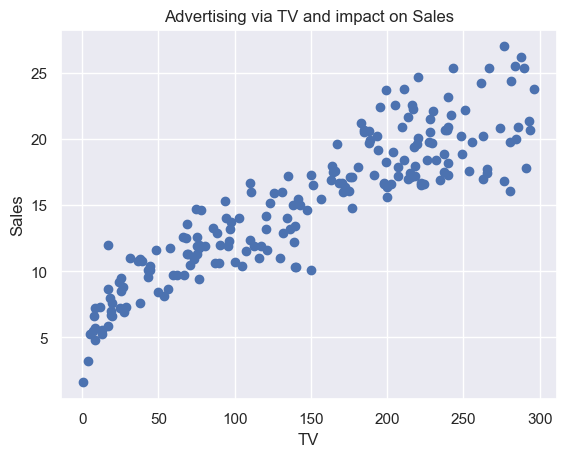

In [11]:
# Visualizing the relation between Advertising via TV and it's impact on sales
plt.scatter(advertising.TV,advertising.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Advertising via TV and impact on Sales')
plt.show()

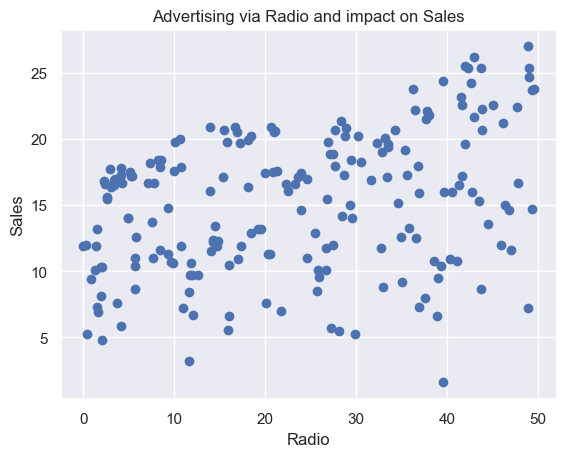

In [12]:
# Visualizing the relation between Advertising via Radio and it's impact on sales
plt.scatter(advertising.Radio,advertising.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Advertising via Radio and impact on Sales')
plt.show()

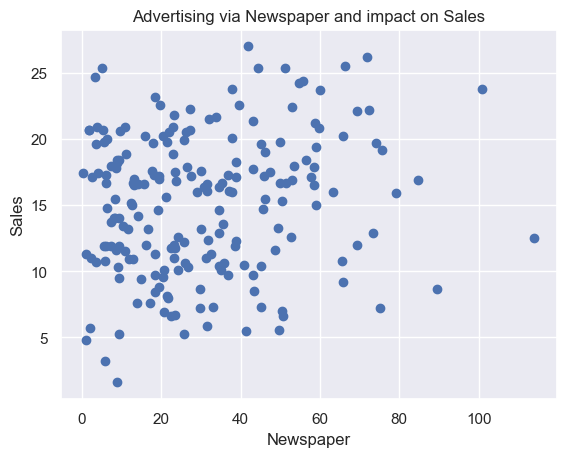

In [13]:
# Visualizing the relation between Advertising via Newspaper and it's impact on sales
plt.scatter(advertising.Newspaper,advertising.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Advertising via Newspaper and impact on Sales')
plt.show()

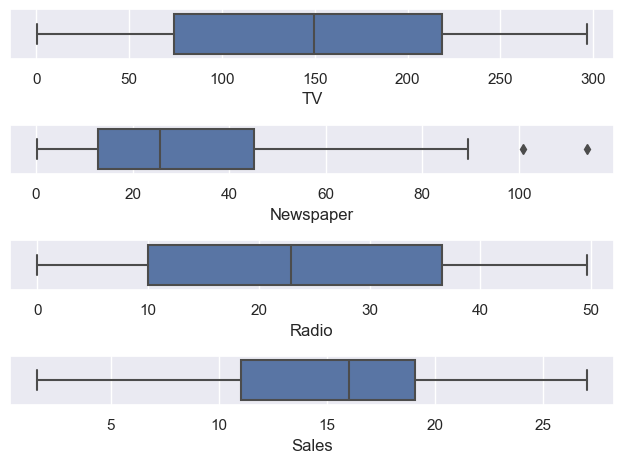

In [14]:
# Figure out if there are outliers in data
fig, axs = plt.subplots(4)
plt1 = sns.boxplot(x=advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(x=advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=advertising['Radio'], ax = axs[2])
plt4 = sns.boxplot(x=advertising['Sales'], ax = axs[3])
plt.tight_layout()

<h9>There are some outliers points in newspaper data but it's not much so we can go to fit the model on that way
, And we can go to deal with these outliers after that and model again to see if that's can make a diffrence in this case </h9>

## Data Modeling

In [15]:
# Features selection
features=advertising.drop('Sales',axis=1)
target=advertising.Sales

In [16]:
features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
target

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [18]:
# Splitting the data to train and test data
features_train,features_test,target_train,target_test=train_test_split(features,target,train_size=0.80,random_state=50)

In [19]:
features_train

,TV,Radio,Newspaper
170,50.0,11.6,18.4
183,287.6,43.0,71.8
38,43.1,26.7,35.1
153,171.3,39.7,37.7
40,202.5,22.3,31.6
...,...,...,...
132,8.4,27.2,2.1
33,265.6,20.0,0.3
109,255.4,26.9,5.5
139,184.9,43.9,1.7


In [20]:
target_train

170     8.4
183    26.2
38     10.1
153    16.0
40     16.6
       ... 
132     5.7
33     17.4
109    19.8
139    20.7
176    20.2
Name: Sales, Length: 160, dtype: float64

In [21]:
features_test.head()

,TV,Radio,Newspaper
112,175.7,15.4,2.4
165,234.5,3.4,84.8
12,23.8,35.1,65.9
73,129.4,5.7,31.3
144,96.2,14.8,38.9


In [22]:
target_test.head()

112    17.1
165    16.9
12      9.2
73     11.0
144    12.3
Name: Sales, dtype: float64

In [23]:
model=LinearRegression()

In [24]:
# Fitting the model
model.fit(features_train,target_train)

LinearRegression()

In [25]:
# Accuracy of train
model.score(features_train,target_train)

0.9019923976035102

In [26]:
# Accuracy of testing
model.score(features_test,target_test)

0.9006409689782177

In [40]:
# Predicting by new user Values
TV_Value=input('Please Enter The value of Advertising Money Via TV : ')
Radio_Value=input('Please Enter The value of Advertising Money Via Radio : ')
Newspaper_value=input('Please Enter The value of Advertising Money Via Newspaper : ')
print(f'\nThe predicted Sales is: {model.predict([[float(TV_Value),float(Radio_Value),float(Newspaper_value)]])[0]}')

Please Enter The value of Advertising Money Via TV : 90
Please Enter The value of Advertising Money Via Radio : 150
Please Enter The value of Advertising Money Via Newspaper : 20

The predicted Sales is: 24.987595391737962


## Identifying outliers values

 <img src='interquartile-range.png' width=500>

In [28]:
# Identify boundaries to idetify Outliers values to deal with it

for x in ['Newspaper']:
    q1,q3 = np.percentile(advertising.loc[:,x],[25,75])
    intr_qr = q3-q1
 
    UpperFence = q3+(1.5*intr_qr)
    LowerFence = q1-(1.5*intr_qr)

In [29]:
# Maximum boundary , so all values greater than it is outlier
print(f'The maximum boundary: {UpperFence}')

# Minimum boundary , so all values less than it is outlier
print(f'The minimum boundary: {LowerFence}')

The maximum boundary: 93.625
The minimum boundary: -35.775000000000006


In [30]:
advertising[(advertising.Newspaper>UpperFence)|(advertising.Newspaper<LowerFence)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [31]:
# There are many ways to deal with outliers Like :
    # remove outliers
    # Subtitute the outlier with the mean value or the median or specific value regarding to the case study
    

In [32]:
# Subtitute Outliers with boundaries of IQR
advertising.Newspaper.loc[advertising.Newspaper>UpperFence]=UpperFence

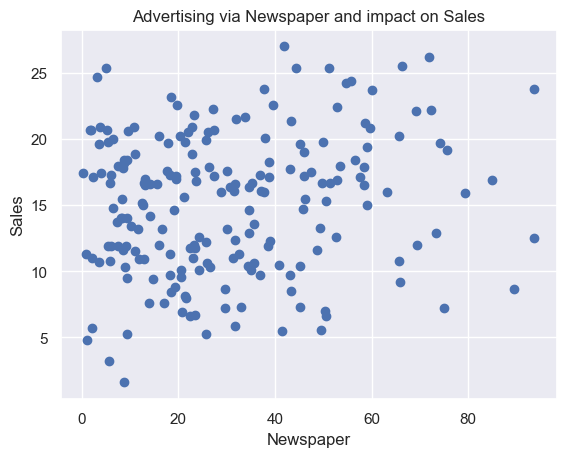

In [33]:
# Visualizing the relation between Advertising via Newspaper and it's impact on sales after subtiute the outliers
plt.scatter(advertising.Newspaper,advertising.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Advertising via Newspaper and impact on Sales')
plt.show()

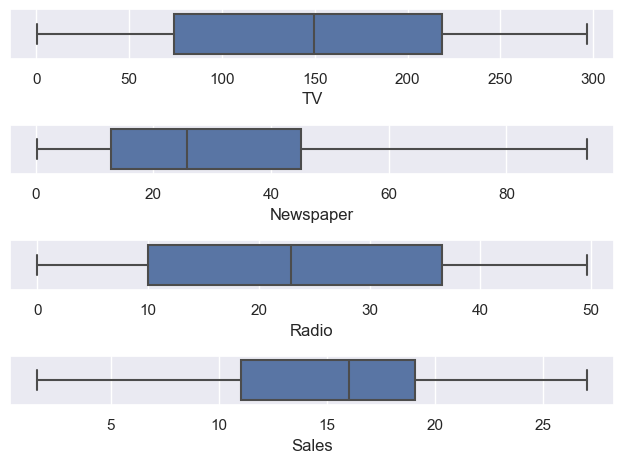

In [34]:
# Displaying the diffrence in newspaper boxplot
fig, axs = plt.subplots(4)
plt1 = sns.boxplot(x=advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(x=advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=advertising['Radio'], ax = axs[2])
plt4 = sns.boxplot(x=advertising['Sales'], ax = axs[3])
plt.tight_layout()

In [35]:
features_train,features_test,target_train,target_test=train_test_split(features,target,train_size=0.80,random_state=50)

In [36]:
model=LinearRegression()

In [37]:
model.fit(features_train,target_train)

LinearRegression()

In [38]:
model.score(features_train,target_train)

0.9019923976035102

In [39]:
model.score(features_test,target_test)

0.9006409689782177